<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_airfoil_S809_combined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!pip install google-auth

In [111]:
from google.colab import auth
from google.colab import drive

In [112]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
!ls /content/drive/MyDrive/Data_from_Karim/AirfoilS809/

data_set1.csv  data_set2.csv  data_set3.csv  data_set4.csv  neuralNetwork_reg.py  ReadMe.docx


In [114]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5,h1 = 61, h2 = 61, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.out(x)

    return x

In [116]:
# torch.manual_seed(42)

model = Model()

In [117]:
# Read the data set - data_set3.csv --> Airfoil S809, Re = 2e6, alpha = 14.2 deg
df1 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set4.csv")

In [118]:
# # Visualize beta field for Airfoil S809, Re = 2e6, alpha = 14.2deg

# xc = np.array(df4['x'])
# yc = np.array(df4['y'])
# b = np.array(df4['beta'])
# b1 = []



# # Normalize x and y coordinates
# min_range = -5.0
# max_range = 5.0
# xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
# yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# # Normalize beta field
# bmin = 0.12
# bmax = 1.15
# b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))

# # #####################################################################
# # # Cleaning the beta field in the wake region
# # for k in range(len(xc)):
# #   if xc[k] >= 5.2 and xc[k] <= 5.3:
# #     if yc[k] >= 4.94 and yc[k] <= 4.96:
# #       b1.append(b[k])

# # for j in range(len(xc)):
# #   if xc[j] > 5.2:
# #     b[j] = np.mean(b1)

# # modified_data = {
# #     'x': np.array(xc),
# #     'y': np.array(yc),
# #     'beta': np.array(b),
# #     'feature1': np.array(df['feature1']),
# #     'feature2': np.array(df['feature2']),
# #     'feature3': np.array(df['feature3']),
# #     'feature4': np.array(df['feature4']),
# #     'feature5': np.array(df['feature5'])
# # }

# # modified_df = pd.DataFrame(modified_data)
# # #####################################################################
# nx = []
# ny = []
# nb = []
# # Filter data for the specified range of coordinates
# for i in range(len(xc)):
#   if xc[i]>=4.9 and xc[i]<=5.3:
#     if yc[i]>=4.925 and yc[i]<=5.075:
#       nx.append(xc[i])
#       ny.append(yc[i])
#       nb.append(b[i])



# # Create a 2D heatmap
# plt.hexbin(nx, ny, C=nb, gridsize=5000, cmap=plt.cm.YlOrRd_r)
# plt.colorbar(label='Field Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Field Visualization')
# plt.show()


# # Create a scatter plot
# plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
# plt.colorbar(label='Beta Field')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('2D Map with Scatter Plot')
# plt.show()


# X, Y = np.meshgrid(nx, ny)

# # Create a contour plot
# plt.figure()
# contour = plt.contour(X, Y, nb, cmap='viridis')
# plt.colorbar(contour, label='Data Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Contour Plot')
# plt.show()

In [119]:
# Combine data
frames = [df1, df2, df3, df4]
df = pd.concat(frames)

# Data for beta>1.02 or beta<0.98
df_filtered = df[(df['beta'] > 1.02) | (df['beta'] < 0.98)]

df_filtered

,x,y,beta,feature1,feature2,feature3,feature4,feature5
4223,1.002941,0.000266,1.020826,388.839310,21.900969,0.967255,1.508905,1.967509
4354,1.003335,0.000254,1.022673,416.192842,22.833886,0.966894,1.509316,1.947481
4487,1.003761,0.000240,1.024621,445.422521,23.761253,0.966239,1.504597,1.926424
4622,1.004218,0.000223,1.026653,475.662365,24.719993,0.965617,1.496260,1.906785
4759,1.004711,0.000205,1.028775,506.540421,25.725407,0.965032,1.485008,1.888850
...,...,...,...,...,...,...,...,...
72500,-0.000032,0.000533,0.974411,185.652209,0.006519,0.988927,0.025115,1.629905
72501,-0.000032,0.000664,0.978203,224.328751,0.009889,0.986127,0.032430,1.762057
72854,-0.000040,0.000408,0.977589,186.914237,0.005170,0.987927,0.019519,1.628130
72855,-0.000042,0.000534,0.979770,224.291912,0.007637,0.985172,0.024738,1.758973


In [120]:
from sklearn.preprocessing import StandardScaler

# Preprocess Features
df1 = df_filtered.drop(['x','y'],axis=1)

# # Fill missing values with the mean
# df1 = df1.fillna(df1.mean())


# Standardization
standard_scaler = StandardScaler()
df1_standardized = standard_scaler.fit_transform(df1)


# Features
X = df1_standardized[:,1:]
# Target
y = df1_standardized[:,0]


In [121]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [122]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=5,shuffle=False)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 100
train_fold = [[] for i in range(5)]
test_fold = [[] for i in range(5)]
c = 0
for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss  )

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_fold[c].append(y_pred.detach().numpy())
  train_fold[c].append(y_train.detach().numpy())
  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  test_fold[c].append(y_eval.detach().numpy())
  test_fold[c].append(y_test.detach().numpy())

  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

  c = c+1

Train Index:  [ 2119  2120  2121 ... 10591 10592 10593] 

Test Index:  [   0    1    2 ... 2116 2117 2118]
Size of training data: 8475 

Size of testing data: 2119 



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8475])) that is different to the input size (torch.Size([8475, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 0 and loss: 1.380570411682129
iter: 10 and loss: 1.0878088474273682
iter: 20 and loss: 1.1087441444396973
iter: 30 and loss: 1.0877922773361206
iter: 40 and loss: 1.0902801752090454
iter: 50 and loss: 1.0878863334655762
iter: 60 and loss: 1.087786078453064
iter: 70 and loss: 1.087725043296814
iter: 80 and loss: 1.0875906944274902
iter: 90 and loss: 1.0875874757766724


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2119])) that is different to the input size (torch.Size([2119, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8475])) that is different to the input size (torch.Size([8475, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.6530)]
MSE error: [0.6495765]
Train Index:  [    0     1     2 ... 10591 10592 10593] 

Test Index:  [2119 2120 2121 ... 4235 4236 4237]
Size of training data: 8475 

Size of testing data: 2119 

iter: 0 and loss: 0.8179141283035278
iter: 10 and loss: 0.8069169521331787
iter: 20 and loss: 0.8058604598045349
iter: 30 and loss: 0.8061585426330566
iter: 40 and loss: 0.805879533290863
iter: 50 and loss: 0.8057166934013367
iter: 60 and loss: 0.8056967854499817
iter: 70 and loss: 0.8056982755661011
iter: 80 and loss: 0.8056950569152832
iter: 90 and loss: 0.8056914210319519


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2119])) that is different to the input size (torch.Size([2119, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8475])) that is different to the input size (torch.Size([8475, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.6530), tensor(1.8142)]
MSE error: [0.6495765, 1.8130021]
Train Index:  [    0     1     2 ... 10591 10592 10593] 

Test Index:  [4238 4239 4240 ... 6354 6355 6356]
Size of training data: 8475 

Size of testing data: 2119 

iter: 0 and loss: 0.9287659525871277
iter: 10 and loss: 0.9244246482849121
iter: 20 and loss: 0.9231119155883789
iter: 30 and loss: 0.9228907823562622
iter: 40 and loss: 0.9228862524032593
iter: 50 and loss: 0.9228907823562622
iter: 60 and loss: 0.9228880405426025
iter: 70 and loss: 0.9228843450546265
iter: 80 and loss: 0.9228820204734802
iter: 90 and loss: 0.9228808879852295


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2119])) that is different to the input size (torch.Size([2119, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8475])) that is different to the input size (torch.Size([8475, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.6530), tensor(1.8142), tensor(1.3089)]
MSE error: [0.6495765, 1.8130021, 1.3089433]
Train Index:  [    0     1     2 ... 10591 10592 10593] 

Test Index:  [6357 6358 6359 ... 8473 8474 8475]
Size of training data: 8475 

Size of testing data: 2119 

iter: 0 and loss: 1.0896940231323242
iter: 10 and loss: 1.0861153602600098
iter: 20 and loss: 1.0848791599273682
iter: 30 and loss: 1.0844720602035522
iter: 40 and loss: 1.084342360496521
iter: 50 and loss: 1.0843013525009155
iter: 60 and loss: 1.084288477897644
iter: 70 and loss: 1.0842841863632202
iter: 80 and loss: 1.0842825174331665
iter: 90 and loss: 1.0842821598052979


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2119])) that is different to the input size (torch.Size([2119, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8476])) that is different to the input size (torch.Size([8476, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.6530), tensor(1.8142), tensor(1.3089), tensor(0.6835)]
MSE error: [0.6495765, 1.8130021, 1.3089433, 0.68373084]
Train Index:  [   0    1    2 ... 8473 8474 8475] 

Test Index:  [ 8476  8477  8478 ... 10591 10592 10593]
Size of training data: 8476 

Size of testing data: 2118 

iter: 0 and loss: 1.090167760848999
iter: 10 and loss: 1.0883041620254517
iter: 20 and loss: 1.0876489877700806
iter: 30 and loss: 1.0874207019805908
iter: 40 and loss: 1.0873427391052246
iter: 50 and loss: 1.0873169898986816
iter: 60 and loss: 1.0873088836669922
iter: 70 and loss: 1.0873064994812012
iter: 80 and loss: 1.087306022644043
iter: 90 and loss: 1.0873059034347534
MSEloss: [tensor(0.6530), tensor(1.8142), tensor(1.3089), tensor(0.6835), tensor(0.6512)]
MSE error: [0.6495765, 1.8130021, 1.3089433, 0.68373084, 0.651413]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2118])) that is different to the input size (torch.Size([2118, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [123]:
train_fold

[[array([[0.02471324],
         [0.024722  ],
         [0.02473335],
         ...,
         [0.025315  ],
         [0.02558841],
         [0.02530822]], dtype=float32),
  array([ 0.8040861 ,  0.56774086,  0.29800633, ..., -1.0387259 ,
         -1.02411   , -1.0228133 ], dtype=float32)],
 [array([[-0.08649206],
         [-0.08647729],
         [-0.08645343],
         ...,
         [-0.08695721],
         [-0.0868922 ],
         [-0.086959  ]], dtype=float32),
  array([-0.74896514, -0.736587  , -0.72353303, ..., -1.0387259 ,
         -1.02411   , -1.0228133 ], dtype=float32)],
 [array([[-0.00897314],
         [-0.00903529],
         [-0.00909345],
         ...,
         [-0.00924219],
         [-0.00915515],
         [-0.00924736]], dtype=float32),
  array([-0.74896514, -0.736587  , -0.72353303, ..., -1.0387259 ,
         -1.02411   , -1.0228133 ], dtype=float32)],
 [array([[0.06462295],
         [0.06454567],
         [0.06447154],
         ...,
         [0.06438426],
         [0.064483

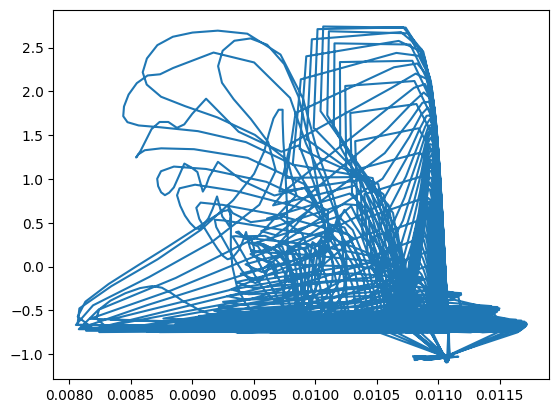

In [132]:
plt.plot(test_fold[4][0],test_fold[4][1])
plt.show()
# len(test_fold[3][0]), len(test_fold[3][1])